Data : https://data.edd.ca.gov/Labor-Force-and-Unemployment-Rates/Local-Area-Unemployment-Statistics-LAUS-/e6gw-gvii

In [1]:
from utils import eda
import ipywidgets as widgets
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
eda_iv = eda.Eda()

In [3]:
#https://ipython.org/ipython-doc/3/interactive/reference.html
!head -n3 './Local_Area_Unemployment_Statistics__LAUS_.csv'

Area Type ,Area Name ,Date,Year ,Month,Seasonally Adjusted (Y/N) ,Status (Preliminary / Final) ,Labor Force,Employment ,Unemployment ,Unemployment Rate 
County,Alameda County,06/01/2019,2019,June,N,Preliminary,844400,818500,25800,0.0
County,Alpine County,06/01/2019,2019,June,N,Preliminary,480,450,40,0.1


In [4]:
eda_iv.load_data('./Local_Area_Unemployment_Statistics__LAUS_.csv')

In [5]:
df_us = eda_iv.df

In [6]:
eda_iv.view_data_details()

********** info **********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148963 entries, 0 to 148962
Data columns (total 11 columns):
area type                       148963 non-null object
area name                       148963 non-null object
date                            148963 non-null object
year                            148963 non-null int64
month                           148963 non-null object
seasonally adjusted (y/n)       148963 non-null object
status (preliminary / final)    148963 non-null object
labor force                     148963 non-null int64
employment                      148963 non-null int64
unemployment                    148963 non-null int64
unemployment rate               148963 non-null float64
dtypes: float64(1), int64(4), object(6)
memory usage: 12.5+ MB
None
********** columns **********
Index(['area type', 'area name', 'date', 'year', 'month',
       'seasonally adjusted (y/n)', 'status (preliminary / final)',
       'labor force', 'employment', 

In [7]:
df_us['date'] = pd.to_datetime(df_us['date'])

In [8]:
df_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148963 entries, 0 to 148962
Data columns (total 11 columns):
area type                       148963 non-null object
area name                       148963 non-null object
date                            148963 non-null datetime64[ns]
year                            148963 non-null int64
month                           148963 non-null object
seasonally adjusted (y/n)       148963 non-null object
status (preliminary / final)    148963 non-null object
labor force                     148963 non-null int64
employment                      148963 non-null int64
unemployment                    148963 non-null int64
unemployment rate               148963 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [9]:
eda_iv.check_for_constant_columns()

[]

In [10]:
eda_iv.view_column_value_counts()

Dropdown(description='Columns', options=('area type', 'area name', 'date', 'year', 'month', 'seasonally adjust…

Sub-County Place     106134
Metropolitan Area     21154
County                20799
State                   876
Name: area type, dtype: int64


In [11]:
eda_iv.view_cardinality_of_data()

Cardinality of data
area type : 4
area name : 1049
date : 522
year : 44
month : 12
seasonally adjusted (y/n) : 2
status (preliminary / final) : 2
labor force : 21803
employment : 21677
unemployment : 12734
unemployment rate : 10


In [34]:
#df_us.groupby('area type', as_index=False)['area name'].nunique()
df_us.groupby('area type')['area name'].nunique()

area type
County                58
Metropolitan Area     59
State                  1
Sub-County Place     931
Name: area name, dtype: int64

In [39]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']
df_us['month'] = pd.Categorical(df_us['month'], months)

In [68]:
df_us[df_us['seasonally adjusted (y/n)']=='N'].groupby(by=['month', 'area type'], axis=0, as_index=False)['labor force', 'employment', 'unemployment', 'unemployment rate'].mean()

,month,area type,labor force,employment,unemployment,unemployment rate
0,January,County,2.911287e+05,2.688744e+05,2.225527e+04,0.105366
1,January,Metropolitan Area,5.722079e+05,5.288072e+05,4.340313e+04,0.099652
2,January,State,1.718181e+07,1.587204e+07,1.309777e+06,0.093333
3,January,Sub-County Place,1.852877e+04,1.700954e+04,1.518072e+03,0.098335
4,February,County,2.927836e+05,2.708792e+05,2.190588e+04,0.103922
5,February,Metropolitan Area,5.751966e+05,5.325029e+05,4.269456e+04,0.096991
6,February,State,1.723865e+07,1.595247e+07,1.286177e+06,0.093333
7,February,Sub-County Place,1.860187e+04,1.712383e+04,1.477071e+03,0.096122
8,March,County,2.922349e+05,2.705844e+05,2.165208e+04,0.102366
9,March,Metropolitan Area,5.743988e+05,5.321718e+05,4.222990e+04,0.096640


In [75]:
df_us[df_us['seasonally adjusted (y/n)']=='N'] \
.groupby(by=['month', 'area type'], axis=0, as_index=False) \
.agg({'unemployment rate':['mean','min','max']})

month          area type unemployment rate          
                                              mean  min  max
0     January             County          0.105366  0.0  0.3
1     January  Metropolitan Area          0.099652  0.0  0.3
2     January              State          0.093333  0.0  0.1
3     January   Sub-County Place          0.098335  0.0  1.0
4    February             County          0.103922  0.0  0.3
5    February  Metropolitan Area          0.096991  0.0  0.3
6    February              State          0.093333  0.0  0.1
7    February   Sub-County Place          0.096122  0.0  1.0
8       March             County          0.102366  0.0  0.3
9       March  Metropolitan Area          0.096640  0.0  0.3
10      March              State          0.093333  0.0  0.1
11      March   Sub-County Place          0.094898  0.0  1.0
12      April             County          0.090941  0.0  0.3
13      April  Metropolitan Area          0.086790  0.0  0.3
14      April              State          0.076667  0.0  0.1
15      April   Sub-County Place          0.085016  0.0  1.0
16        May             County          0.084527  0.0  0.3
17        May  Metropolitan Area          0.081555  0.0  0.3
18        May              State          0.066667  0.0  0.1
19        May   Sub-County Place          0.080118  0.0  1.0
20       June             County          0.089486  0.0  0.3
21       June  Metropolitan Area          0.086760  0.0  0.3
22       June              State          0.083333  0.0  0.1
23       June   Sub-County Place          0.085414  0.0  1.0
24       July             County          0.092533  0.0  0.4
25       July  Metropolitan Area          0.092077  0.0  0.4
26       July              State          0.096552  0.0  0.1
27       July   Sub-County Place          0.093209  0.0  1.0
28     August             County          0.085910  0.0  0.4
29     August  Metropolitan Area          0.086211  0.0  0.4
30     August              State          0.082759  0.0  0.1
31     August   Sub-County Place          0.088662  0.0  1.0
32  September             County          0.080836  0.0  0.4
33  September  Metropolitan Area          0.082614  0.0  0.4
34  September              State          0.082759  0.0  0.1
35  September   Sub-County Place          0.082003  0.0  1.0
36    October             County          0.083284  0.0  0.3
37    October  Metropolitan Area          0.083573  0.0  0.3
38    October              State          0.079310  0.0  0.1
39    October   Sub-County Place          0.082444  0.0  1.0
40   November             County          0.092060  0.0  0.3
41   November  Metropolitan Area          0.090048  0.0  0.3
42   November              State          0.082759  0.0  0.1
43   November   Sub-County Place          0.083900  0.0  1.0
44   December             County          0.093075  0.0  0.3
45   December  Metropolitan Area          0.088982  0.0  0.3
46   December              State          0.079310  0.0  0.1
47   December   Sub-County Place          0.086048  0.0  1.0

In [76]:
df_us[df_us['seasonally adjusted (y/n)']=='N'] \
.pivot_table(index='month',columns='area type',
             values='unemployment rate',
             aggfunc = {'unemployment rate':[min, max, np.mean]})

max                                               mean  \
area type County Metropolitan Area State Sub-County Place    County   
month                                                                 
January      0.3               0.3   0.1              1.0  0.105366   
February     0.3               0.3   0.1              1.0  0.103922   
March        0.3               0.3   0.1              1.0  0.102366   
April        0.3               0.3   0.1              1.0  0.090941   
May          0.3               0.3   0.1              1.0  0.084527   
June         0.3               0.3   0.1              1.0  0.089486   
July         0.4               0.4   0.1              1.0  0.092533   
August       0.4               0.4   0.1              1.0  0.085910   
September    0.4               0.4   0.1              1.0  0.080836   
October      0.3               0.3   0.1              1.0  0.083284   
November     0.3               0.3   0.1              1.0  0.092060   
December     0.3               0.3   0.1              1.0  0.093075   

                                                          min  \
area type Metropolitan Area     State Sub-County Place County   
month                                                           
January            0.099652  0.093333         0.098335    0.0   
February           0.096991  0.093333         0.096122    0.0   
March              0.096640  0.093333         0.094898    0.0   
April              0.086790  0.076667         0.085016    0.0   
May                0.081555  0.066667         0.080118    0.0   
June               0.086760  0.083333         0.085414    0.0   
July               0.092077  0.096552         0.093209    0.0   
August             0.086211  0.082759         0.088662    0.0   
September          0.082614  0.082759         0.082003    0.0   
October            0.083573  0.079310         0.082444    0.0   
November           0.090048  0.082759         0.083900    0.0   
December           0.088982  0.079310         0.086048    0.0   

                                                    
area type Metropolitan Area State Sub-County Place  
month                                               
January                 0.0   0.0              0.0  
February                0.0   0.0              0.0  
March                   0.0   0.0              0.0  
April                   0.0   0.0              0.0  
May                     0.0   0.0              0.0  
June                    0.0   0.0              0.0  
July                    0.0   0.0              0.0  
August                  0.0   0.0              0.0  
September               0.0   0.0              0.0  
October                 0.0   0.0              0.0  
November                0.0   0.0              0.0  
December                0.0   0.0              0.0

In [46]:
import seaborn as sns

In [53]:
df_us[df_us['seasonally adjusted (y/n)']=='N'].head()

,area type,area name,date,year,month,seasonally adjusted (y/n),status (preliminary / final),labor force,employment,unemployment,unemployment rate
0,County,Alameda County,2019-06-01,2019,June,N,Preliminary,844400,818500,25800,0.0
1,County,Alpine County,2019-06-01,2019,June,N,Preliminary,480,450,40,0.1
2,County,Amador County,2019-06-01,2019,June,N,Preliminary,15080,14510,570,0.0
3,County,Butte County,2019-06-01,2019,June,N,Preliminary,101300,96000,5300,0.1
4,County,Calaveras County,2019-06-01,2019,June,N,Preliminary,21500,20680,820,0.0


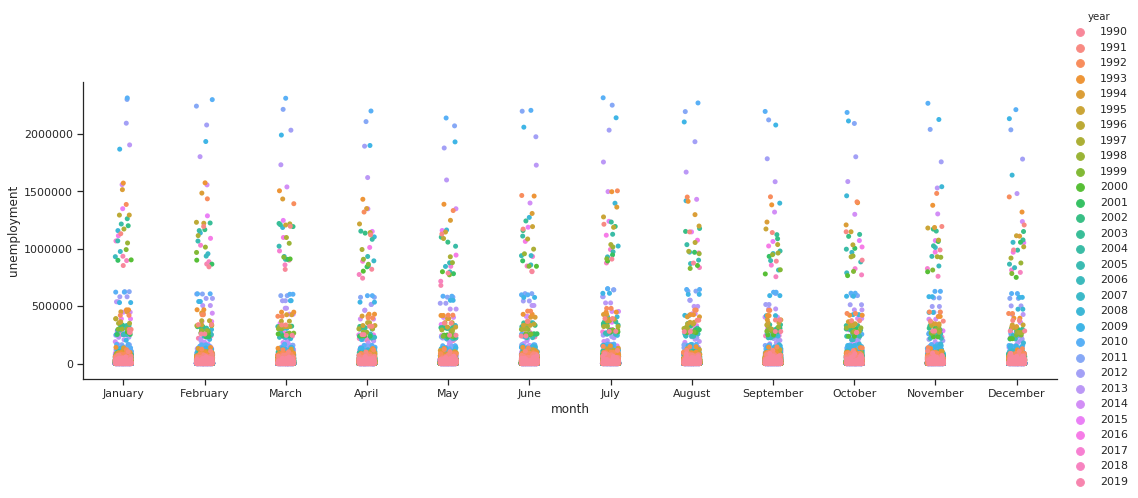

In [66]:
# fig, ax = plt.subplots()
# # the size of A4 paper
# fig.set_size_inches(11.7, 8.27)
#sns.set(rc={'figure.figsize':(35,10)})
with sns.axes_style(style='ticks'):
    g = sns.factorplot("month", "unemployment", "year", 
                       data=df_us[df_us['seasonally adjusted (y/n)']=='N'], 
                       kind="strip",  aspect=3)

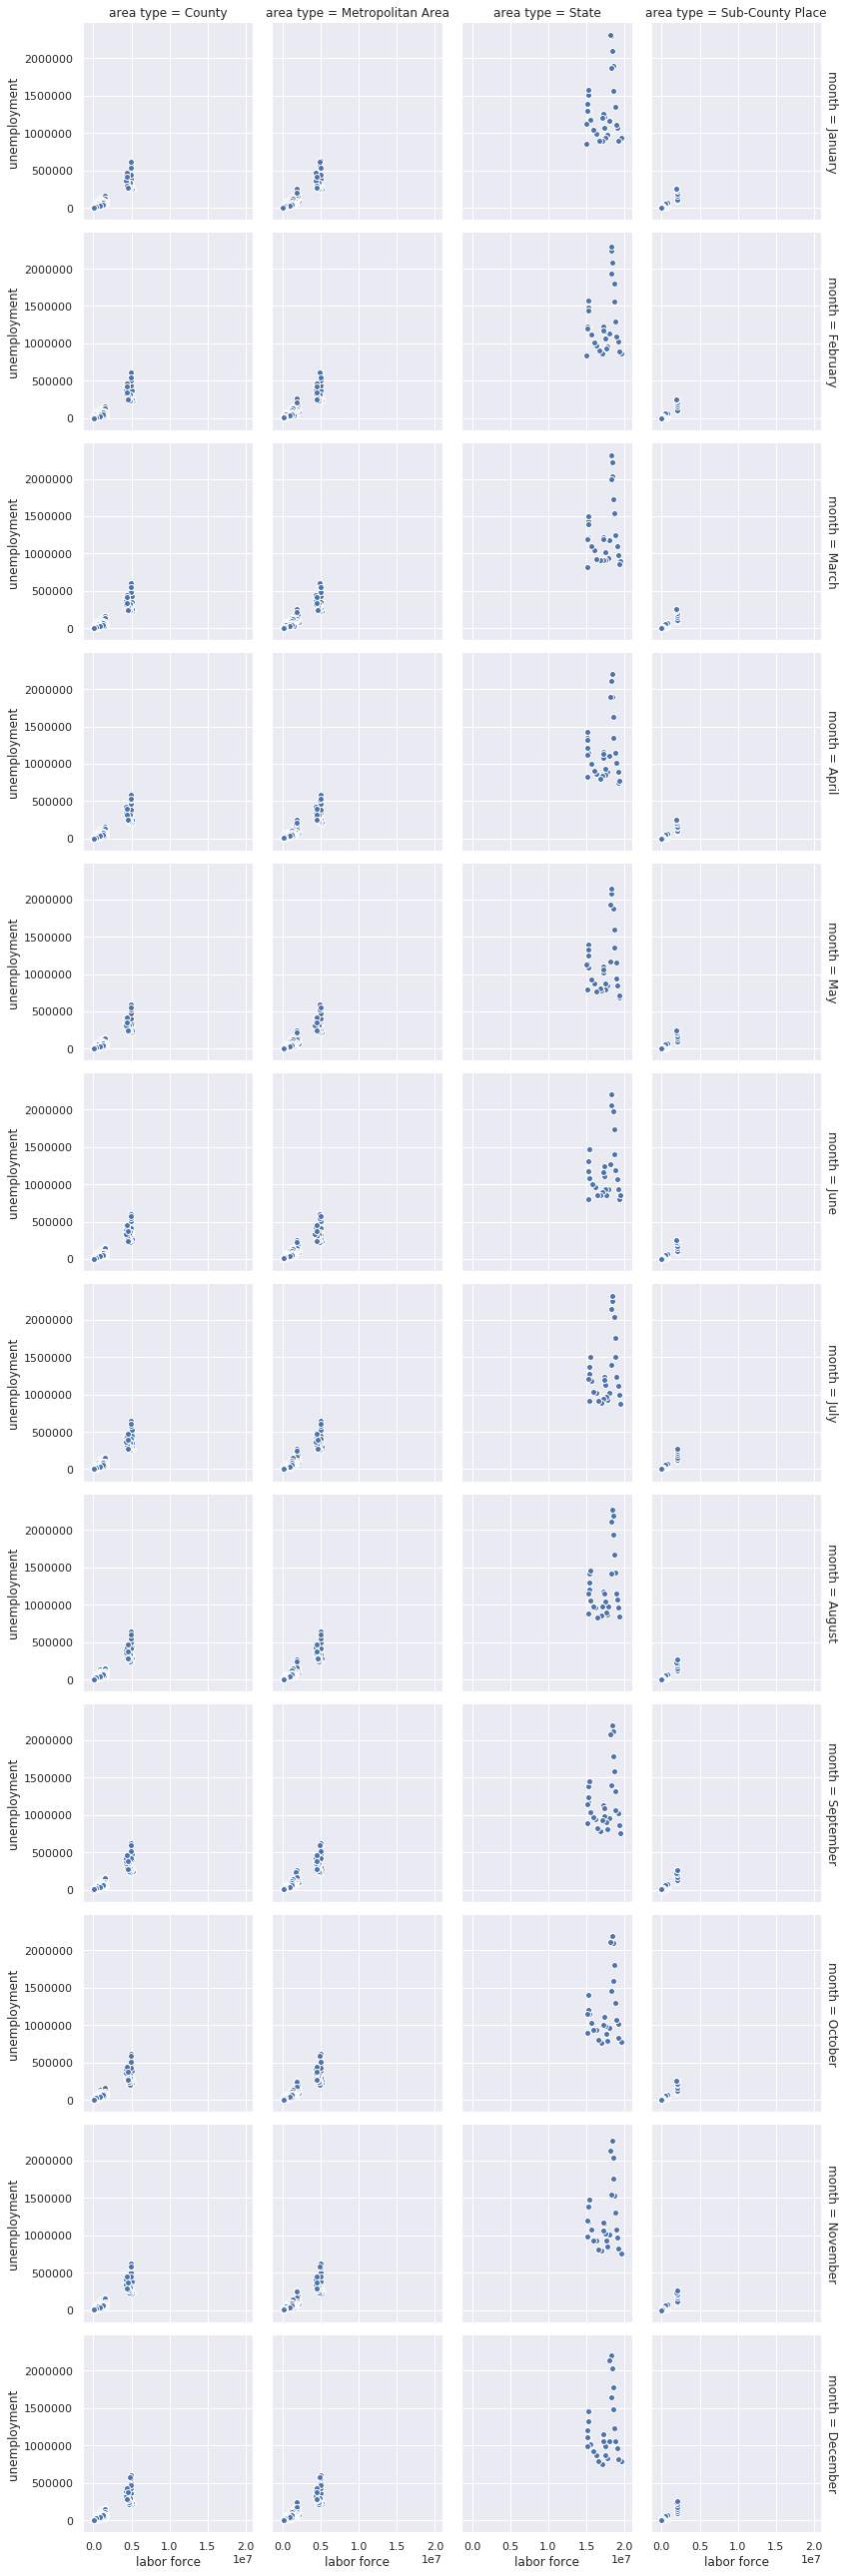

In [51]:
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

g = sns.FacetGrid(df_us[df_us['seasonally adjusted (y/n)']=='N'], row="month", col="area type",margin_titles=True)

(g.map(plt.scatter, "labor force","unemployment", edgecolor="w")).add_legend()


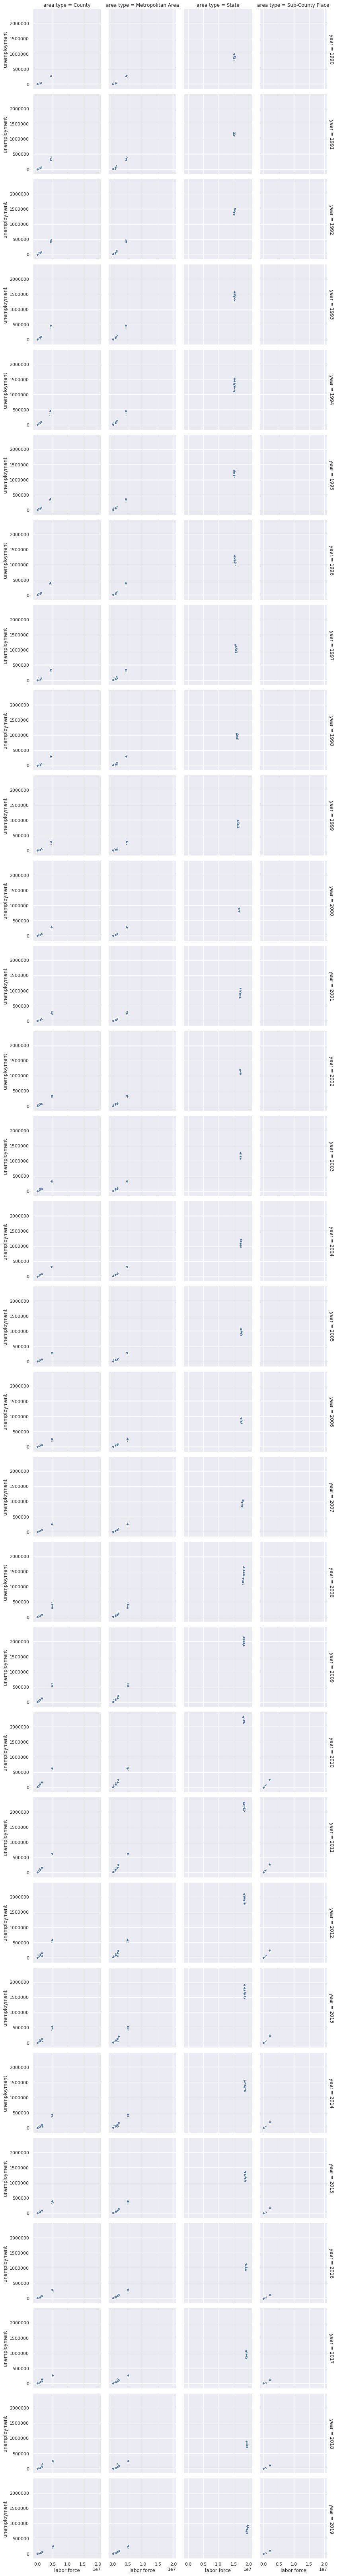

In [67]:
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

g = sns.FacetGrid(df_us[df_us['seasonally adjusted (y/n)']=='N'], row="year", col="area type",margin_titles=True)

(g.map(plt.scatter, "labor force","unemployment", edgecolor="w")).add_legend()

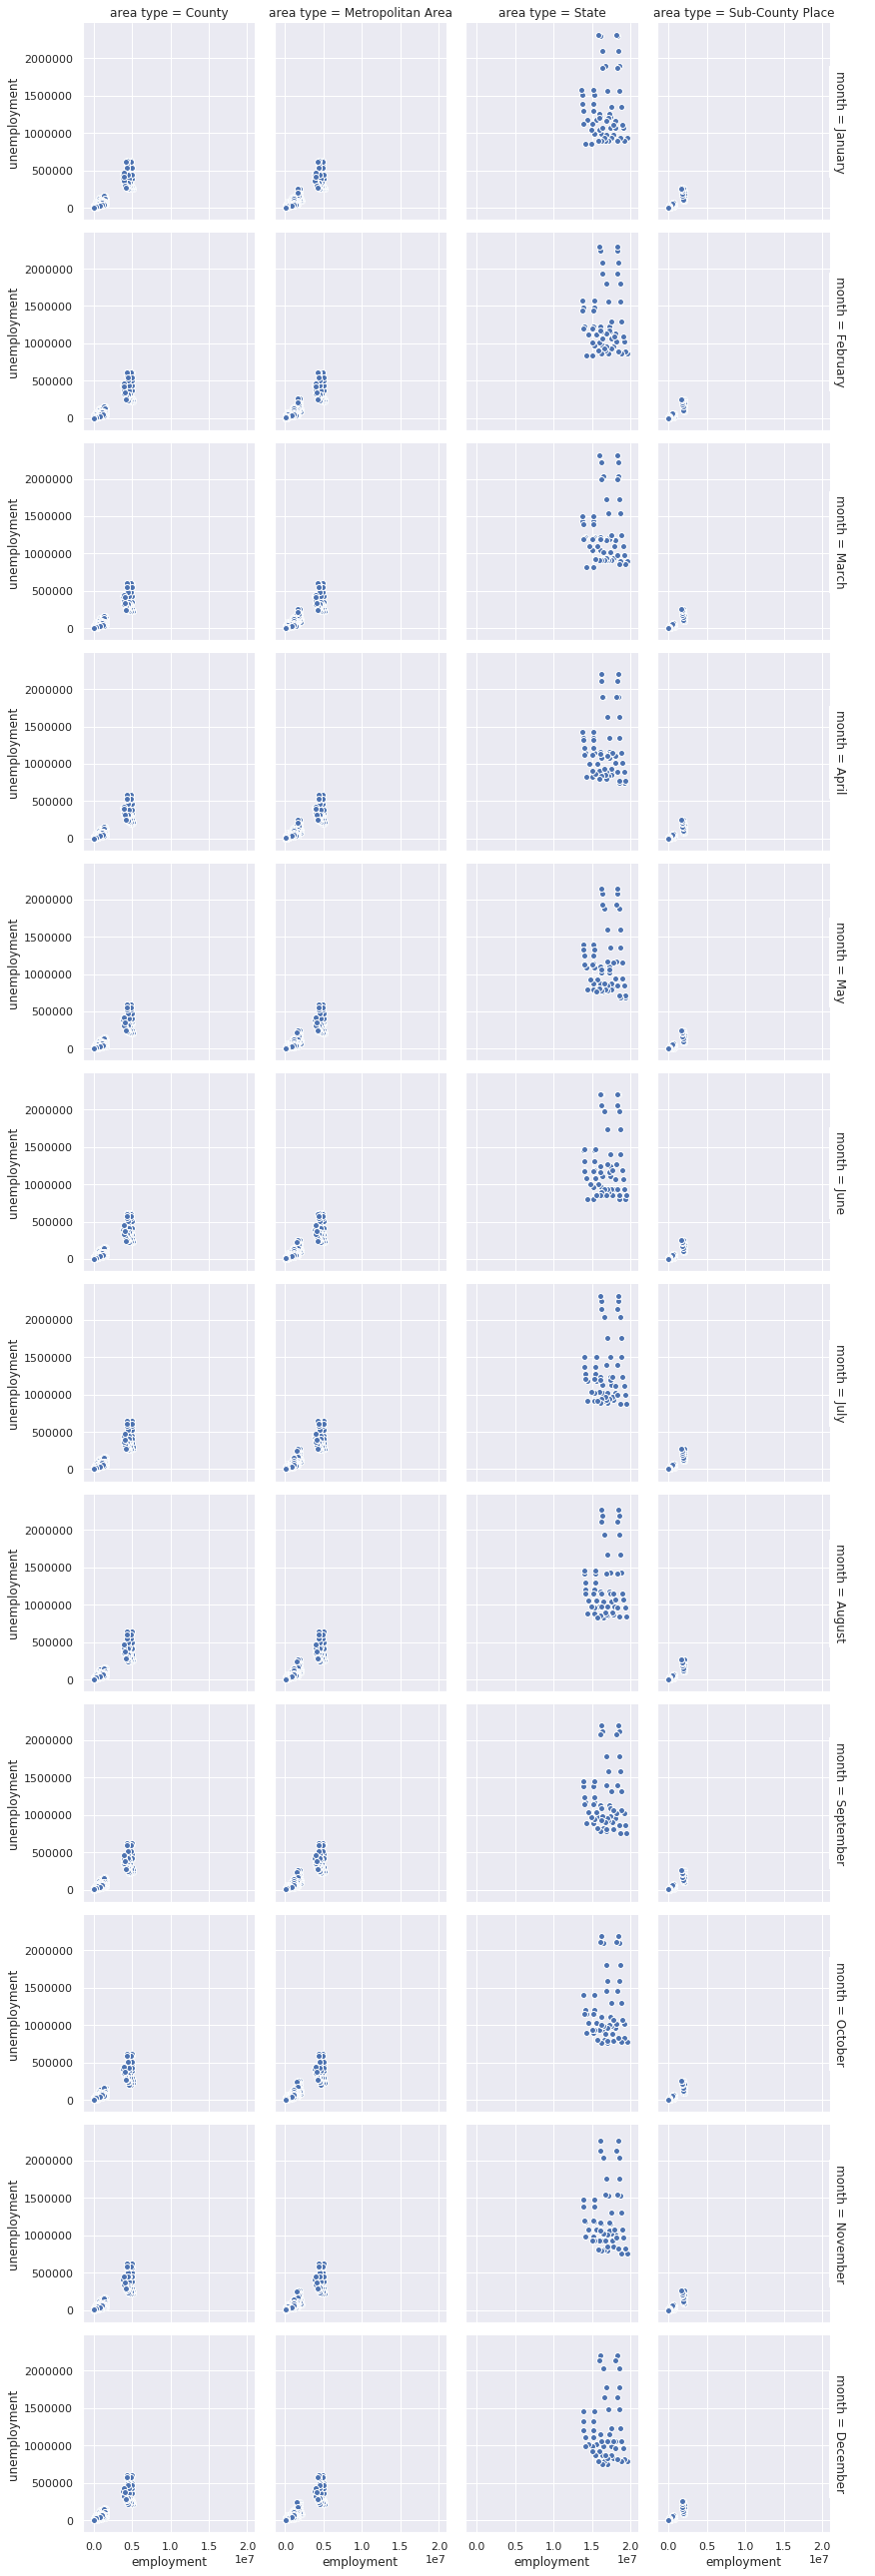

In [55]:
g = sns.FacetGrid(df_us[df_us['seasonally adjusted (y/n)']=='N'], row="month", col="area type",margin_titles=True)

(g.map(plt.scatter, "labor force","unemployment", edgecolor="w")).add_legend()

(g.map(plt.scatter, "employment", "unemployment", edgecolor="w")).add_legend()

In [13]:
df_us.loc[df_us['area type']=='County','area name'].value_counts()

Los Angeles County        708
Riverside County          354
Sacramento County         354
Amador County             354
Trinity County            354
San Bernardino County     354
Inyo County               354
Lassen County             354
Marin County              354
Butte County              354
Del Norte County          354
Glenn County              354
San Diego County          354
Stanislaus County         354
Sutter County             354
Fresno County             354
Monterey County           354
Imperial County           354
Nevada County             354
Tehama County             354
Santa Barbara County      354
Sierra County             354
Solano County             354
Alpine County             354
San Francisco County      354
Alameda County            354
Napa County               354
Madera County             354
Calaveras County          354
Humboldt County           354
Contra Costa County       354
Merced County             354
Ventura County            354
Tulare Cou

In [14]:
df_us.loc[df_us['area type']=='Metropolitan Area','area name'].value_counts()

Los Angeles-Long Beach-Glendale MD                            708
Madera MSA                                                    354
Visalia-Porterville MSA                                       354
Chico MSA                                                     354
San Diego-Carlsbad, CA MSA                                    354
Vallejo-Fairfield MSA                                         354
Santa Rosa MSA                                                354
Salinas, CA MSA                                               354
Los Angeles-Long Beach-Anaheim, CA MSA                        354
San Francisco-Redwood City-South San Francisco, CA Met Div    354
Redding MSA                                                   354
San Jose-Sunnyvale-Santa Clara MSA                            354
San Luis Obispo-Paso Robles-Arroyo Grande, CA MSA             354
Visalia-Porterville, CA MSA                                   354
Santa Cruz-Watsonville MSA                                    354
Merced, CA

In [15]:
(df_us[['labor force', 'employment', 'unemployment']]>=0).all()

labor force     True
employment      True
unemployment    True
dtype: bool

In [16]:
(df_us[['labor force', 'employment', 'unemployment']]==0).sum()

labor force      1584
employment       1929
unemployment    14422
dtype: int64

In [17]:
df_us.loc[df_us['area type']=='State', ['date','labor force', 'employmgent', 'unemployment', 'unemployment rate']].head()

/home/ch1/anaconda3/envs/for_github/lib/python3.7/site-packages/pandas/core/indexing.py:1404: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,date,labor force,employmgent,unemployment,unemployment rate
119,2019-06-01,19421500,NaN,813700,0.0
120,2019-06-01,19293700,NaN,800500,0.0
1171,2019-05-01,19479200,NaN,826100,0.0
1172,2019-05-01,19290200,NaN,680900,0.0
2223,2019-04-01,19528400,NaN,835900,0.0


In [18]:
df_us.loc[df_us['area type']=='State','seasonally adjusted (y/n)'].value_counts()

Y    522
N    354
Name: seasonally adjusted (y/n), dtype: int64

In [19]:
df_us.loc[(df_us['area type']=='State') & (df_us['seasonally adjusted (y/n)']=='Y')].head()

,area type,area name,date,year,month,seasonally adjusted (y/n),status (preliminary / final),labor force,employment,unemployment,unemployment rate
119,State,California,2019-06-01,2019,June,Y,Preliminary,19421500,18607800,813700,0.0
1171,State,California,2019-05-01,2019,May,Y,Final,19479200,18653100,826100,0.0
2223,State,California,2019-04-01,2019,April,Y,Final,19528400,18692500,835900,0.0
3276,State,California,2019-03-01,2019,March,Y,Final,19580200,18741900,838300,0.0
4328,State,California,2019-02-01,2019,February,Y,Final,19582200,18758000,824200,0.0


In [20]:
df_state_seas_adjusted = df_us.loc[(df_us['area type']=='State') & (df_us['seasonally adjusted (y/n)']=='Y'), ['date','labor force', 'employment', 'unemployment']]

In [21]:
#df_state_seas_adjusted['diff'] = df_state_seas_adjusted['labor force'] - df_state_seas_adjusted['employment']

In [22]:
df_state_seas_adjusted.head()

,date,labor force,employment,unemployment
119,2019-06-01,19421500,18607800,813700
1171,2019-05-01,19479200,18653100,826100
2223,2019-04-01,19528400,18692500,835900
3276,2019-03-01,19580200,18741900,838300
4328,2019-02-01,19582200,18758000,824200


In [23]:
df_state_seas_adjusted.duplicated().sum()

0

In [24]:
df_state_seas_adjusted.set_index('date').sort_index().index

DatetimeIndex(['1976-01-01', '1976-02-01', '1976-03-01', '1976-04-01',
               '1976-05-01', '1976-06-01', '1976-07-01', '1976-08-01',
               '1976-09-01', '1976-10-01',
               ...
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01'],
              dtype='datetime64[ns]', name='date', length=522, freq=None)

In [25]:
#_=df_state_seas_adjusted.set_index('date').sort_index().rolling(window='365D').mean().plot()

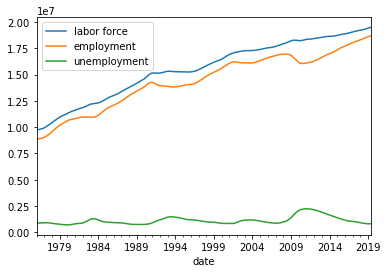

In [26]:
df_state_seas_adjusted_365_mean = df_state_seas_adjusted.set_index('date').sort_index().rolling(window='365D').mean()
_=df_state_seas_adjusted_365_mean.plot()

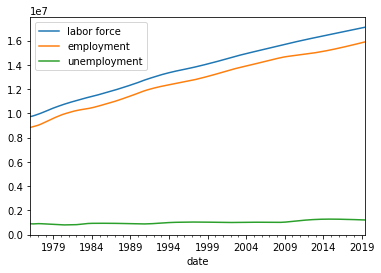

In [27]:
df_state_seas_adjusted_365_mean = df_state_seas_adjusted.set_index('date').sort_index().ewm(span=500).mean()
_=df_state_seas_adjusted_365_mean.plot()

In [28]:
#df_state_seas_adjusted.set_index('date').plot()

In [29]:
df_us.loc[(df_us['area type']=='State') & (df_us['seasonally adjusted (y/n)']=='N')].head()

,area type,area name,date,year,month,seasonally adjusted (y/n),status (preliminary / final),labor force,employment,unemployment,unemployment rate
120,State,California,2019-06-01,2019,June,N,Preliminary,19293700,18493300,800500,0.0
1172,State,California,2019-05-01,2019,May,N,Final,19290200,18609200,680900,0.0
2224,State,California,2019-04-01,2019,April,N,Final,19243500,18499600,743900,0.0
3275,State,California,2019-03-01,2019,March,N,Final,19511600,18611000,900500,0.0
4327,State,California,2019-02-01,2019,February,N,Final,19596300,18729000,867300,0.0


In [30]:
df_state_seas_not_adjusted = df_us.loc[(df_us['area type']=='State') & (df_us['seasonally adjusted (y/n)']=='N'), ['date','labor force', 'employment', 'unemployment']]

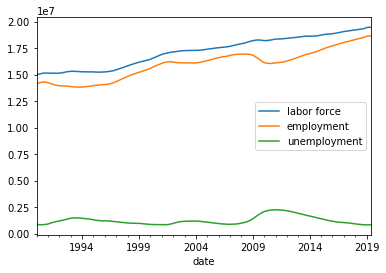

In [31]:
df_state_seas_not_adjusted_365_mean = df_state_seas_not_adjusted.set_index('date').sort_index().rolling(window='365D').mean()
_=df_state_seas_not_adjusted_365_mean.plot()

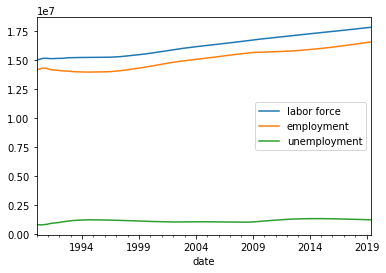

In [32]:
df_state_seas_not_adjusted_365_mean = df_state_seas_not_adjusted.set_index('date').sort_index().ewm(span=500).mean()
_=df_state_seas_not_adjusted_365_mean.plot()